# Linear Regression Project - The Outliers

### Regression Using Previous Data

We will be applying Linear Regression on the training and test data that was created by splitting from the previous assignment. The main data set used is not suitable for a regression analysis, so we instead use the 'auto-mpg' data set which is perfect for linear regression.

In [1]:
import pandas as pd

prev_train = pd.read_csv('previous_train.csv')
prev_test = pd.read_csv('previous_test.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv('previous_train.csv')

# Get the data types of each column
column_types = df.dtypes

# Print the data types
print(column_types)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
encoded_name      int64
dtype: object


### Simple Linear Regression Model Using Previous Data

Then, we perform a simple linear regression by selecting an independent variable from the data, the weight of the vehicle, and a dependent variable, the mpg it gets.

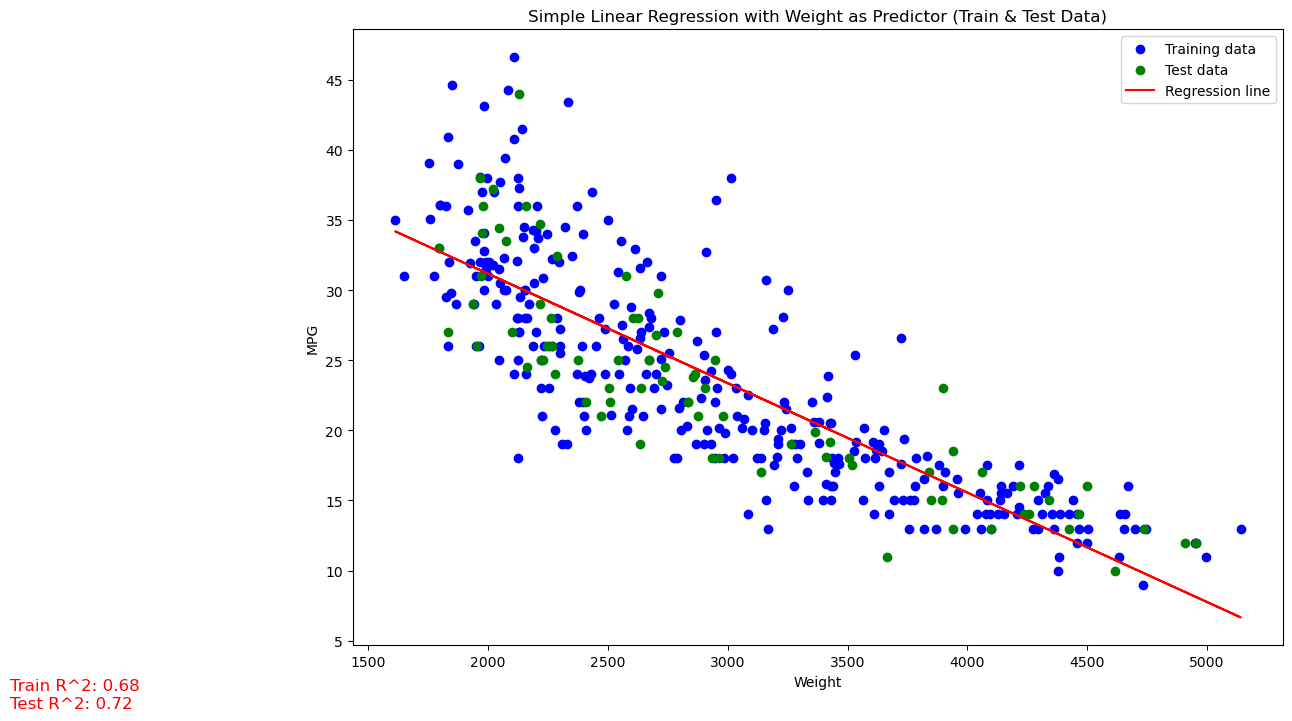

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

#Preparing the data of the x and y variable:

X_train = prev_train['weight'].values.reshape(-1,1)  #Independent variable for training
Y_train = prev_train['mpg'].values     #Dependent variable for training

X_test = prev_test['weight'].values.reshape(-1, 1)   #Independent variable for testing
Y_test = prev_test['mpg'].values       #Dependent variable for testing

#Model training
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

#Predictions
Y_pred_train = lin_reg.predict(X_train)
Y_pred_test = lin_reg.predict(X_test)

#Evaluation using R-Squared
train_r2 = r2_score(Y_train, Y_pred_train)
test_r2 = r2_score(Y_test, Y_pred_test)

#Visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_train, Y_train, color='blue', label='Training data')
plt.scatter(X_test, Y_test, color='green', label='Test data')
plt.plot(X_train, Y_pred_train, color='red', label='Regression line')

# Annotate the R-squared values
plt.text(6, 1.5, f'Train R^2: {train_r2:.2f}', fontsize=12, color='red')
plt.text(6, 0.2, f'Test R^2: {test_r2:.2f}', fontsize=12, color='red')

plt.title('Simple Linear Regression with Weight as Predictor (Train & Test Data)')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.show()

### Multiple Regression Model Using Previous Data

To perform multiple regression we use multiple independent variables, dropping the MPG, horsepower, and name columns due to their data types.

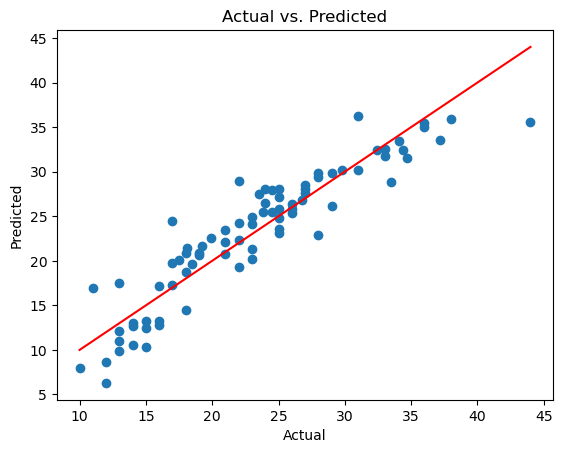

(0.8161602979317827,
 0.8459245725122748,
 11.526054857767193,
 8.284087805275984,
 array([-0.11075365,  0.01277126, -0.00706753,  0.12422585,  0.80766359,
         1.10068256,  0.00485124]))

In [3]:
import matplotlib.pyplot as plt

#Assign independent and dependent variables
X_train_multi = prev_train.drop(['mpg', 'horsepower', 'name'], axis=1)   #Independent variables for training
Y_train_multi = prev_train['mpg']                                           #Dependent variable for training

X_test_multi = prev_test.drop(['mpg', 'horsepower', 'name'], axis=1)     #Independent variables for testing
Y_test_multi = prev_test['mpg']                                               #Dependent variable for testing

#Model training for multiple regression
multi_reg = LinearRegression()
multi_reg.fit(X_train_multi, Y_train_multi)

#Predictions
Y_pred_train_multi = multi_reg.predict(X_train_multi)
Y_pred_test_multi = multi_reg.predict(X_test_multi)

#Evaluation using R2
train_r2_multi = r2_score(Y_train_multi, Y_pred_train_multi)
test_r2_multi = r2_score(Y_test_multi, Y_pred_test_multi)
train_mse_multi = mean_squared_error(Y_train_multi, Y_pred_train_multi)
test_mse_multi = mean_squared_error(Y_test_multi, Y_pred_test_multi)

coefficients = multi_reg.coef_

plt.scatter(Y_test_multi, Y_pred_test_multi)
plt.plot([min(Y_test_multi), max(Y_test_multi)], [min(Y_test_multi), max(Y_test_multi)], color='red')  # 45-degree line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

(train_r2_multi, test_r2_multi, train_mse_multi, test_mse_multi, coefficients)

### Loading Second Dataset and split into training and test 

We will load the second dataset provided to us from Canvas and split them into one set of training and test datasets. 
We will split the dataset by 80-20 where 80% of the dataset will be used for training and the remaining 20% will be used for the test set. We will make sure that we use random spliting to divide the dataset into training and test set. 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Load the dataset
df = pd.read_csv('Admission_Predict_Dataset.csv')

#Split the dataset into training and test sets by a 80-20 split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.head(), test_df.head(), train_df.shape, test_df.shape


(     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 249         250        321          111                  3  3.5   4.0  8.83   
 433         434        316          111                  4  4.0   5.0  8.54   
 19           20        303          102                  3  3.5   3.0  8.50   
 322         323        314          107                  2  2.5   4.0  8.27   
 332         333        308          106                  3  3.5   2.5  8.21   
 
      Research  Chance of Admit   
 249         1              0.77  
 433         0              0.71  
 19          0              0.62  
 322         0              0.72  
 332         1              0.75  ,
      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 361         362        334          116                  4  4.0   3.5  9.54   
 73           74        314          108                  4  4.5   4.0  9.04   
 374         375        315          105                  2  2.0   

### Perform Simple Linear Regression

For simple linear regression, we need to select one independent variable(predictor) and the dependent variable (target), which in this case is the 'Chance of Admit' column. For our evaluation, we will choose 'CGPA' as the independent variable since it is a common strong predictor of graduate school admission in real life.

We will use the training data to fit a simple linear regression model. After that, we will predict the 'Chance of Admit' for both training and test sets to evaluate the model's performance. We will then evaluate the model using the R-Squared method to determine how well the independent variable explains the variability of the dependent variable. And finally, we will visualize the result along with the R-Squared values.


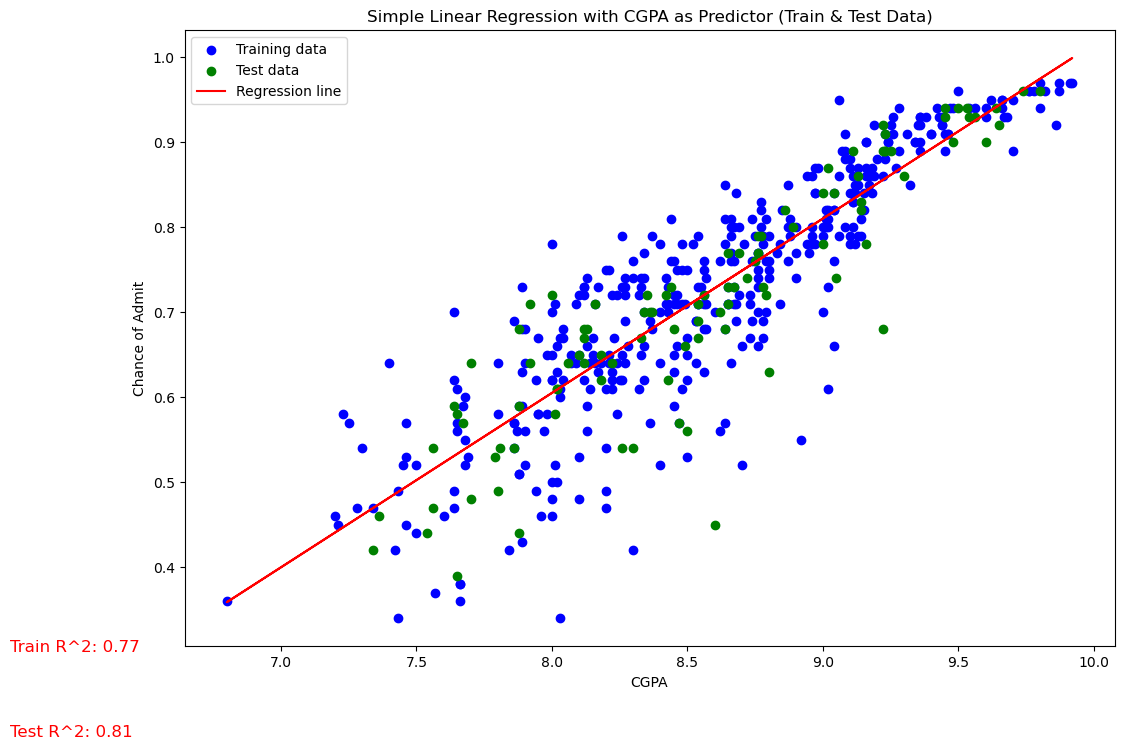

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

#Preparing the data of the x and y variable:

X_train = train_df['CGPA'].values.reshape(-1,1)  #Independent variable for training
Y_train = train_df['Chance of Admit '].values     #Dependent variable for training

X_test = test_df['CGPA'].values.reshape(-1, 1)   #Independent variable for testing
Y_test = test_df['Chance of Admit '].values       #Dependent variable for testing

#Model training
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

#Predictions
Y_pred_train = lin_reg.predict(X_train)
Y_pred_test = lin_reg.predict(X_test)

#Evaluation using R-Squared
train_r2 = r2_score(Y_train, Y_pred_train)
test_r2 = r2_score(Y_test, Y_pred_test)

#Visualization
plt.figure(figsize=(12, 8))
plt.scatter(X_train, Y_train, color='blue', label='Training data')
plt.scatter(X_test, Y_test, color='green', label='Test data')
plt.plot(X_train, Y_pred_train, color='red', label='Regression line')

# Annotate the R-squared values
plt.text(6, 0.3, f'Train R^2: {train_r2:.2f}', fontsize=12, color='red')
plt.text(6, 0.2, f'Test R^2: {test_r2:.2f}', fontsize=12, color='red')

plt.title('Simple Linear Regression with CGPA as Predictor (Train & Test Data)')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()


### Perform Multiple Regression

We will now perform multple regression using multiple independent variables. For this, we will use all the columns except for 'Serial No.' and 'Chance of Admit'. 

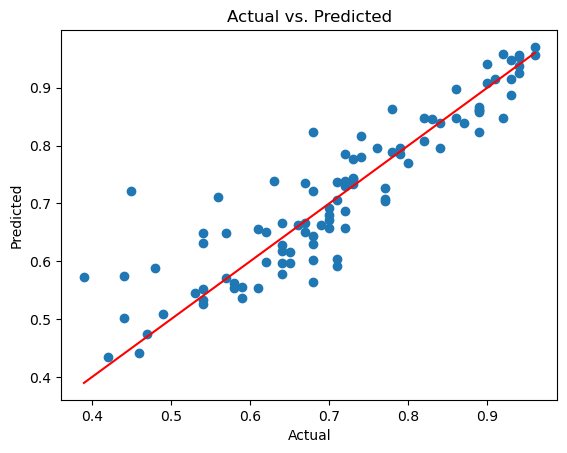

(0.8210671369321553,
 0.8188432567829629,
 0.0035265554784557596,
 0.00370465539878841,
 array([0.00243444, 0.00299587, 0.0025688 , 0.00181369, 0.01723798,
        0.11252708, 0.02402679]))

In [6]:
import matplotlib.pyplot as plt

#Assign independent and dependent variables
X_train_multi = train_df.drop(['Serial No.', 'Chance of Admit '], axis=1)   #Independent variables for training
Y_train_multi = train_df[('Chance of Admit ')]                              #Dependent variable for training

X_test_multi = test_df.drop(['Serial No.', 'Chance of Admit '], axis=1)     #Independent variables for testing
Y_test_multi = test_df['Chance of Admit ']                                  #Dependent variable for testing

#Model training for multiple regression
multi_reg = LinearRegression()
multi_reg.fit(X_train_multi, Y_train_multi)

#Predictions
Y_pred_train_multi = multi_reg.predict(X_train_multi)
Y_pred_test_multi = multi_reg.predict(X_test_multi)

#Evaluation using R2
train_r2_multi = r2_score(Y_train_multi, Y_pred_train_multi)
test_r2_multi = r2_score(Y_test_multi, Y_pred_test_multi)
train_mse_multi = mean_squared_error(Y_train_multi, Y_pred_train_multi)
test_mse_multi = mean_squared_error(Y_test_multi, Y_pred_test_multi)

coefficients = multi_reg.coef_

plt.scatter(Y_test_multi, Y_pred_test_multi)
plt.plot([min(Y_test_multi), max(Y_test_multi)], [min(Y_test_multi), max(Y_test_multi)], color='red')  # 45-degree line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

(train_r2_multi, test_r2_multi, train_mse_multi, test_mse_multi, coefficients)